In [17]:
import numpy as np
from scipy.stats import laplace
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from Master_Functions import CondExtBivNegLogLik
from DeltaLaplaceFuncs import DeltaLaplace

In [19]:
# For module development
%load_ext autoreload
%autoreload 2

print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
numpy 1.19.5
pandas 1.1.5


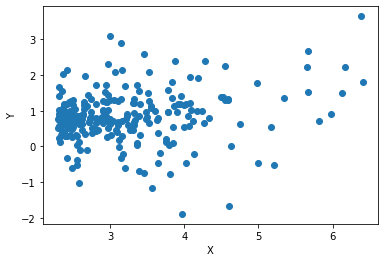

In [66]:
# Create toy data. We require X to be Laplace. 
X = laplace(0,1).rvs(5000)

#We'll also let Z be Delta_Laplace noise

#Condition on X being larger than some high quantile u

u = np.quantile(X,0.95)
X = X[X>u]
Z = DeltaLaplace(loc =0.1,scale = 0.3,shape = 1).rvs(size=len(X), random_state = 2)

Y = 0.2 * X + Z*(X**0.8)


fig=plt.figure()
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [70]:
## Fit distribution. We will use Delta-Laplace margins.If use_DL = False, uses Gaussian margins for residual.

init_par=[0.5,0.2,0.2,0.5,2]

X_data, Y_data = X,Y

use_DL = True

fit = minimize(fun = CondExtBivNegLogLik,x0 = init_par,
               args=(X_data,Y_data,use_DL),
               method="Nelder-Mead")
fit = minimize(fun = CondExtBivNegLogLik,x0 = fit.x,
               args=(X_data,Y_data,use_DL),
               method="BFGS")

fit

      fun: 240.1572753354181
 hess_inv: array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])
      jac: array([ 15.66971397,  -0.7550354 ,  11.58855629, -10.0047245 ,
        -0.65049553])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 342
      nit: 0
     njev: 55
   status: 2
  success: False
        x: array([2.85440778e-07, 7.96554327e-01, 3.41634795e-01, 2.73201862e-01,
       9.80435346e-01])

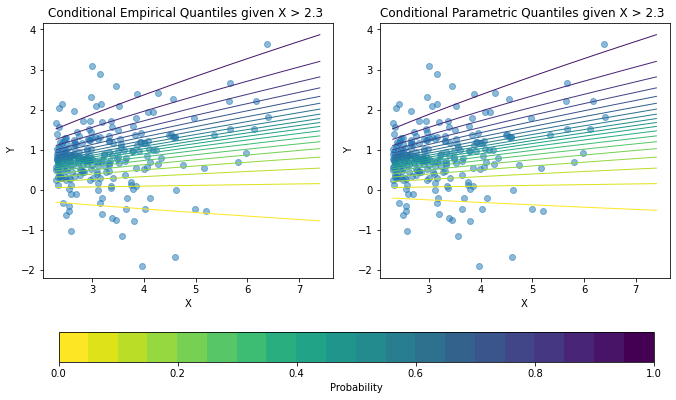

In [71]:
#Plot fit
from Master_Functions import plot_bivariate_condExt_fit

#This can be done using either the empirical residual quantiles or the parametric delta-Laplace quantiles. Choose between
#plot_type = ("Model","Empirical","Both")
#Other inputs:
#X,Y data for fitting - Can be unconditoned
#u - Threshold for conditional quantile Y| X > u. Should be greater than or equal to that used for fitting
#par_ests - parameter estimates. Only supports (alpha, beta, mu, sigma) or (alpha, beta, mu, sigma, delta)
#zoom - If True, plots only (X,Y)| X>u. Plots all data, otherwise.

u=min(X_data)
    
plot_bivariate_condExt_fit(X = X,Y = Y,u = u, par_ests = fit.x, probs = np.linspace(0.05,0.95,19), 
                           plot_type = "Both", zoom = True)



# Using real data - Australian summer heatwaves (Wadsworth and Tawn, 2019)


In [72]:
import pandas as pd

In [73]:
df=pd.read_csv("data/Aus_Temp_Values.csv", index_col=[0])
coords=pd.read_csv("data/Aus_Temp_Coordinates.csv", index_col=[0])


In [74]:
print(df.shape)
df.head()

##5324 observations, Summer only (DJF), 1957-2014
##There are 72 observation locations, (lat,lon) coordinates given in coords

(5234, 72)


,Location_Index.1,Location_Index.2,Location_Index.3,Location_Index.4,Location_Index.5,Location_Index.6,Location_Index.7,Location_Index.8,Location_Index.9,Location_Index.10,...,Location_Index.63,Location_Index.64,Location_Index.65,Location_Index.66,Location_Index.67,Location_Index.68,Location_Index.69,Location_Index.70,Location_Index.71,Location_Index.72
1,-1.429028,-2.278988,-1.623868,-0.584468,1.120629,-0.035781,-0.113780,-0.147076,0.172627,1.175413,...,3.120704,2.179615,0.554757,-0.549779,-0.593419,0.334144,2.813729,3.998774,1.905111,0.776986
2,-1.174794,-1.393772,-1.265354,-0.544497,0.513057,-0.480102,-0.471189,-0.433947,-0.075152,0.587901,...,3.579516,1.585841,0.188645,-0.549779,0.215532,0.951280,2.194935,1.040722,0.430709,0.125189
3,-0.549117,-0.702551,-0.394069,-0.014818,0.426604,-0.005363,0.070222,0.375267,0.449995,0.469660,...,2.544529,1.413991,0.089672,-0.882485,2.591860,2.100093,2.447230,1.546512,0.627535,0.178318
4,-0.035385,-0.099541,0.144866,0.559091,0.815525,0.439861,0.760504,1.399175,1.463920,0.699855,...,1.884780,0.991134,0.020066,-1.038561,0.970756,2.728311,1.791187,1.088917,0.857860,0.178318
5,-0.152179,-0.141339,-0.010755,-0.014818,-0.223382,0.258133,0.642676,0.960222,0.728334,0.149291,...,2.020650,1.033179,0.214584,-0.208213,-0.395770,0.178318,1.835690,1.620965,0.857860,0.327496


In [75]:
print(coords.shape)
coords.head()

n_locs = coords.shape[0]

(72, 2)


Data has already undergone site-wise marginal transformation to standard Laplace and so no pre-processing is required.

In [76]:
#For a single-pair of sites

Cond_site_ind, Dep_site_ind = 2,3

X = df.iloc[:,Cond_site_ind]
Y = df.iloc[:,Dep_site_ind]


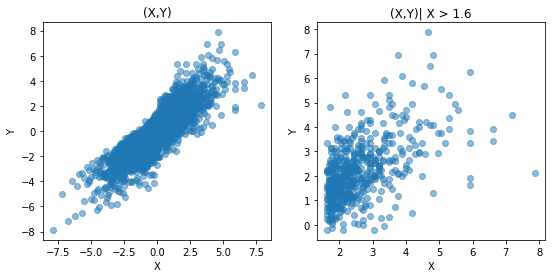

In [77]:
#Condition on X > u. We take u to be the 90% quantile.

u = np.quantile(X, 0.9)

X_data = X[X > u]
Y_data = Y[X > u]

fig , axs = plt.subplots(1,2, figsize=(9, 4))
axs[0].scatter(X,Y, alpha = 0.5)
axs[1].scatter(X_data,Y_data, alpha = 0.5)

axs[0].set(xlabel="X", ylabel="Y")
axs[1].set(xlabel="X", ylabel="Y")

axs[0].set_title("(X,Y)")
axs[1].set_title("(X,Y)| X > %.1f" %u)
plt.show()

In [78]:
## Fit bivariate Heff. and Tawn. Use Delta-Laplace margins.

init_par=[0.5,0.6,0.2,0.2,1]


use_DL = True

fit = minimize(fun = CondExtBivNegLogLik,x0 = init_par,
               args=(X_data,Y_data,use_DL),
               method="Nelder-Mead")
fit = minimize(fun = CondExtBivNegLogLik,x0 = fit.x,
               args=(X_data,Y_data,use_DL),
               method="BFGS")

fit.x

array([0.60172998, 0.64842535, 0.32792537, 0.5637855 , 1.62224312])

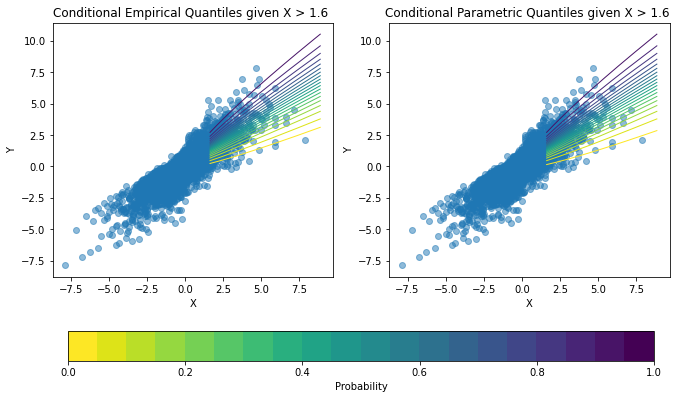

In [79]:
#Plot fit

u=min(X_data)
    
plot_bivariate_condExt_fit(X = X,Y = Y,u = u, par_ests = fit.x, probs = np.linspace(0.05,0.95,19), 
                           plot_type = "Both", zoom = False)


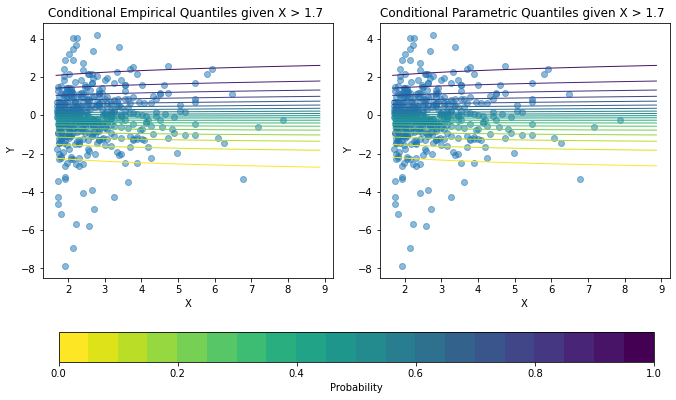

In [80]:
# Fit with less dependence

Cond_site_ind, Dep_site_ind = 0,71

X = df.iloc[:,Cond_site_ind]
Y = df.iloc[:,Dep_site_ind]
u = np.quantile(X, 0.9)

X_data = X[X > u]
Y_data = Y[X > u]

init_par=[0.3,0.6,0.2,0.2,1]


use_DL = True

fit = minimize(fun = CondExtBivNegLogLik,x0 = init_par,
               args=(X_data,Y_data,use_DL),
               method="Nelder-Mead")
fit = minimize(fun = CondExtBivNegLogLik,x0 = fit.x,
               args=(X_data,Y_data,use_DL),
               method="BFGS")

u=min(X_data)
    
plot_bivariate_condExt_fit(X = X,Y = Y,u = u, par_ests = fit.x, probs = np.linspace(0.05,0.95,19),  plot_type = "Both", zoom = True)


In [82]:
print(fit.x)
#Small alpha and beta, so very low dependence. We would expect Y| X > u to be approximately standard Laplace.

[ 0.00633646  0.12361802 -0.05824733  1.23908234  0.92812317]


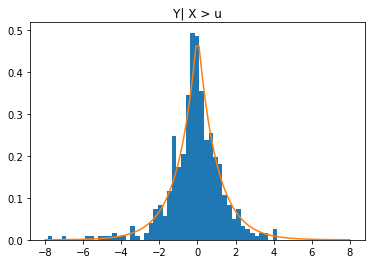

In [83]:
from scipy.stats import laplace

dist=laplace()
plt.hist(Y_data, 50, density = True)
plt.title('Y| X > u')

probs=dist.pdf(np.linspace(-8,8,100))
plt.plot(np.linspace(-8,8,100),probs)
plt.show()

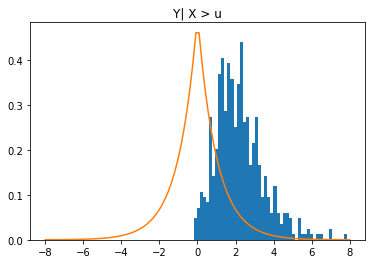

In [84]:
#And for the highly dependent pair?
Cond_site_ind, Dep_site_ind = 2,3

X = df.iloc[:,Cond_site_ind]
Y = df.iloc[:,Dep_site_ind]

u = np.quantile(X, 0.9)

X_data = X[X > u]
Y_data = Y[X > u]

plt.hist(Y_data, 50, density = True)
plt.title('Y| X > u')

probs=dist.pdf(np.linspace(-8,8,100))
plt.plot(np.linspace(-8,8,100),probs)
plt.show()
